In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats

# Loading data

In [38]:
predictor_data = pd.read_excel("Downloads/PredictorData (1).xls")
predictor_data.head()

,yyyyq,Index,D3,D12,E3,E12,b/m,tbl,AAA,BAA,...,SP12,Unnamed: 31,Num,Benchmark_Sum,Benchmark_Premium,Benchmark_SE,Benchmark_SE_Sum,SP3SE,BSE_SP3SE_Dif,SP3SE_Sum
0,18711,4.61,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,0.030781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18712,4.82,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,0.035396,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,18713,4.84,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,0.035845,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,18714,4.74,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,0.000115,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,18721,5.04,NaN,0.27,NaN,0.4075,NaN,NaN,NaN,NaN,...,0.011372,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
predictor_data.shape

(540, 40)

## Gather the Data needed

In [12]:
data = predictor_data[['yyyyq','Index','E3','Rfree','ik']].copy()
data['SP3'] = data.E3/data.Index - data.Rfree
data = data.dropna().reset_index(drop = True)
data['Premium_Sum'] = 0.0
data['Benchmark_Prediction'] = 0.0
data['Predictor_1'] = 0.0
data['Predictor_2'] = 0.0
data['Predictor_3'] = 0.0
data['Predictor_4'] = 0.0
data['Predictor_5'] = 0.0
data['Predictor_6'] = 0.0
data['Predictor_7'] = 0.0
data['Predictor_8'] = 0.0
data['Predictor_9'] = 0.0
data['Predictor_10'] = 0.0
data['Predictor_11'] = 0.0
data['Predictor_12'] = 0.0
data['Predictor_13'] = 0.0
data['Predictor_14'] = 0.0
data['Predictor_15'] = 0.0
data.head()
#print(data['SP3'].dtype)
#print(data['Premium_Sum'].dtype)

,yyyyq,Index,E3,Rfree,ik,SP3,Premium_Sum,Benchmark_Prediction,Predictor_1,Predictor_2,...,Predictor_6,Predictor_7,Predictor_8,Predictor_9,Predictor_10,Predictor_11,Predictor_12,Predictor_13,Predictor_14,Predictor_15
0,19471,15.17,0.40,0.000950,0.036043,0.025418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19472,15.21,0.38,0.000950,0.035089,0.024034,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19473,15.11,0.37,0.001841,0.034053,0.022646,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19474,15.30,0.46,0.002266,0.034825,0.027800,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19481,15.08,0.50,0.002474,0.036635,0.030683,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



# Calculating CSPE for Benchmark & 15 Individual Predictors


## Benchmark


### Find Benchmark Predictions

In [13]:
i = 0
j = 1.0
data['Premium_Sum'][0] = data['SP3'][0]
while i<234:
    data['Premium_Sum'][i+1] = data['SP3'][i+1] + data['Premium_Sum'][i]
    data['Benchmark_Prediction'][i+1] = data['Premium_Sum'][i]/j
    i += 1
    j += 1.0
data.head()

/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,yyyyq,Index,E3,Rfree,ik,SP3,Premium_Sum,Benchmark_Prediction,Predictor_1,Predictor_2,...,Predictor_6,Predictor_7,Predictor_8,Predictor_9,Predictor_10,Predictor_11,Predictor_12,Predictor_13,Predictor_14,Predictor_15
0,19471,15.17,0.40,0.000950,0.036043,0.025418,0.025418,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19472,15.21,0.38,0.000950,0.035089,0.024034,0.049452,0.025418,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19473,15.11,0.37,0.001841,0.034053,0.022646,0.072098,0.024726,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19474,15.30,0.46,0.002266,0.034825,0.027800,0.099897,0.024033,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19481,15.08,0.50,0.002474,0.036635,0.030683,0.130580,0.024974,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Predictor

/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


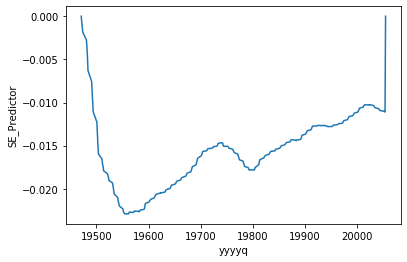

In [37]:

i = 1
data['SE_Predictor'] = 0.0
data['SE_Predictor'][0] = np.square(data['SP3'][0] - data['Benchmark_Prediction'][0]) - np.square(data['SP3'][0] - data['Predictor_1'][0])
while i < 235:
    data['SE_Predictor'][i] = np.square(data['SP3'][i] - data['Benchmark_Prediction'][i]) - np.square(data['SP3'][i] - data['Predictor_1'][i]) + data['SE_Predictor'][i-1]
    i += 1
data
ax = sns.lineplot(x='yyyyq', y="SE_Predictor", data= data)

/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/qinxinhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/qinxinhan/opt/anaconda3/lib/python3.7/s

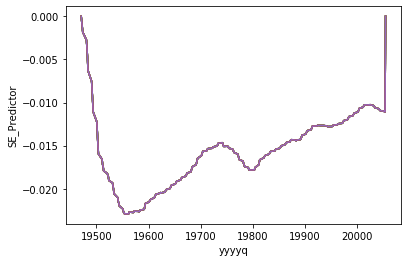

In [31]:
r_hat = np.array(['Predictor_1', 'Predictor_2','Predictor_3','Predictor_4','Predictor_5','Predictor_6','Predictor_7','Predictor_8','Predictor_9','Predictor_10','Predictor_11','Predictor_12','Predictor_13','Predictor_14','Predictor_15'])
n = 0
while n<15:
    i = 1
    data['SE_Predictor'] = 0.0
    data['SE_Predictor'][0] = np.square(data['SP3'][0] - data['Benchmark_Prediction'][0]) - np.square(data['SP3'][0] - data[r_hat[n]][0])
    while i < 235:
        data['SE_Predictor'][i] = np.square(data['SP3'][i] - data['Benchmark_Prediction'][i]) - np.square(data['SP3'][i] - data[r_hat[n]][i]) + data['SE_Predictor'][i-1]
        i += 1
    ax = sns.lineplot(x='yyyyq', y="SE_Predictor", data= data)
    n += 1

# Figure 1
This figure is drawn by data in excel

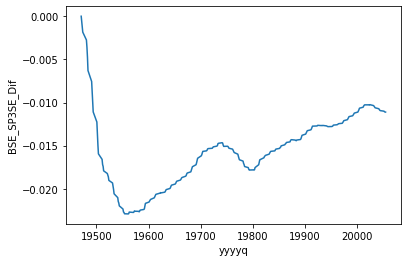

In [39]:
ax = sns.lineplot(x='yyyyq', y='BSE_SP3SE_Dif', data= predictor_data)
# change the x and y to different sizes